In [165]:
import os
from google.analytics.data_v1beta import BetaAnalyticsDataClient
from google.analytics.data_v1beta.types import (
    DateRange,
    Dimension,
    Metric,
    RunReportRequest,
    Filter,
    FilterExpression
)
import pandas as pd
import matplotlib.pyplot as plt
import datetime

In [166]:
def most_viewed_pages_report(limit=100000,offset=0,duration=30):
    """Runs a simple report on a Google Analytics 4 property."""
    # TODO(developer): Uncomment this variable and replace with your
    #  Google Analytics 4 property ID before running the sample.
    # property_id = "YOUR-GA4-PROPERTY-ID"
    os.environ['GOOGLE_APPLICATION_CREDENTIALS']='google-analytics-credentials.json'
    property_id="353919955"
    # Using a default constructor instructs the client to use the credentials
    # specified in GOOGLE_APPLICATION_CREDENTIALS environment variable.
    client = BetaAnalyticsDataClient()
    today=datetime.date.today()
    end_date=today-datetime.timedelta(days=1)  
    start_date=end_date-datetime.timedelta(days=duration)
    request = RunReportRequest(
        property=f"properties/{property_id}",
        dimensions=[Dimension(name="fullPageUrl")],
        metrics=[
            Metric(name="totalUsers"),
            Metric(name="activeUsers"),
            Metric(name='newUsers'),
            Metric(name='bounceRate'),
            Metric(name='keyEvents'),
            Metric(name='userEngagementDuration'),
        ],
        date_ranges=[DateRange(start_date=start_date.strftime('%Y-%m-%d'), end_date=end_date.strftime('%Y-%m-%d'))],
        limit=limit,
        offset=offset,
    )
    response = client.run_report(request)
    return response

In [167]:
def page_views_report(url=''):
    """Runs a simple report on a Google Analytics 4 property."""
    # TODO(developer): Uncomment this variable and replace with your
    #  Google Analytics 4 property ID before running the sample.
    # property_id = "YOUR-GA4-PROPERTY-ID"
    os.environ['GOOGLE_APPLICATION_CREDENTIALS']='google-analytics-credentials.json'
    property_id="353919955"
    # Using a default constructor instructs the client to use the credentials
    # specified in GOOGLE_APPLICATION_CREDENTIALS environment variable.
    client = BetaAnalyticsDataClient()
    if url=='':
        url_filter=None
    else:
        url_filter=FilterExpression(
            filter=Filter(
                field_name='fullPageUrl',
                string_filter=Filter.StringFilter(value=url)
            )
        )
    request = RunReportRequest(
        property=f"properties/{property_id}",
        dimensions=[Dimension(name="date")],
        metrics=[
            Metric(name="totalUsers"),
            Metric(name="activeUsers"),
            Metric(name='newUsers'),
            Metric(name='bounceRate'),
            Metric(name='keyEvents'),
            Metric(name='userEngagementDuration'),
        ],
        date_ranges=[DateRange(start_date="2023-10-16", end_date="yesterday")],
        dimension_filter=url_filter,
    )
    response = client.run_report(request)
    return response
    



In [168]:
response=page_views_report('')

In [169]:
columns=[]
for dimensionHeader in response.dimension_headers:
    columns.append(dimensionHeader.name)
for metricHeader in response.metric_headers:
    columns.append(metricHeader.name)
data=[]
for row in response.rows:
    row_value=[]
    for dimension_value in row.dimension_values:
        row_value.append(dimension_value.value)
    for metric_value in row.metric_values:
        row_value.append(metric_value.value)
    data.append(row_value)
df=pd.DataFrame(data,columns=columns)
df['date']=pd.to_datetime(df['date'])
df.set_index('date',inplace=True)
df.sort_index(inplace=True)
df['totalUsers']=df['totalUsers'].astype(int)
df['activeUsers']=df['activeUsers'].astype(int)
df['newUsers']=df['newUsers'].astype(int)
df['keyEvents']=df['keyEvents'].astype(int)
df['bounceRate']=df['bounceRate'].astype(float)
df['userEngagementDuration']=df['userEngagementDuration'].astype(int)


In [170]:
df

,totalUsers,activeUsers,newUsers,bounceRate,keyEvents,userEngagementDuration
date,,,,,,
2023-10-16,3147,2861,2324,0.477392,100,306336
2023-10-17,3349,3046,2501,0.489026,84,333326
2023-10-18,3055,2721,2201,0.475726,85,262113
2023-10-19,3521,3247,2735,0.438738,94,277123
2023-10-20,2542,2290,1828,0.478361,58,242467
...,...,...,...,...,...,...
2024-05-13,3057,2765,2333,0.487737,47,268625
2024-05-14,3107,2835,2351,0.501597,69,251556
2024-05-15,3071,2764,2281,0.498491,52,240740


<Axes: xlabel='date'>

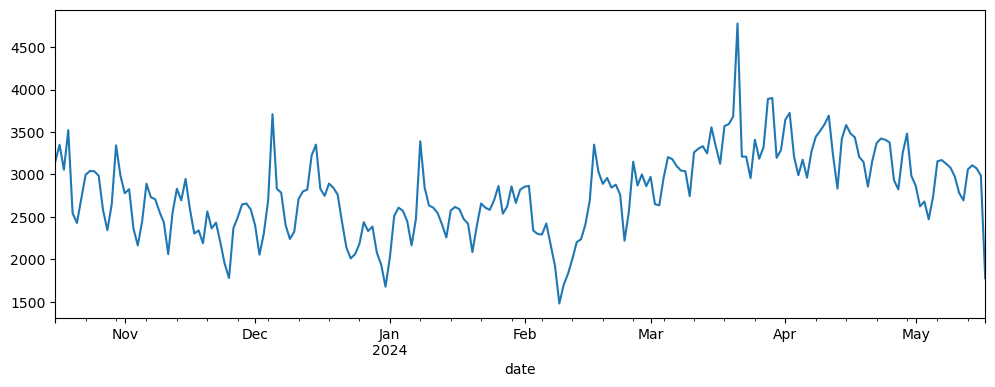

In [171]:
fig=plt.figure(figsize=(12,4))
df['totalUsers'].plot()

In [172]:
page_response=most_viewed_pages_report(duration=7)
columns=[]
for dimensionHeader in page_response.dimension_headers:
    columns.append(dimensionHeader.name)
for metricHeader in page_response.metric_headers:
    columns.append(metricHeader.name)
data=[]
for row in page_response.rows:
    row_value=[]
    for dimension_value in row.dimension_values:
        row_value.append(dimension_value.value)
    for metric_value in row.metric_values:
        row_value.append(metric_value.value)
    data.append(row_value)
df=pd.DataFrame(data,columns=columns)
df['totalUsers']=df['totalUsers'].astype(int)
df['activeUsers']=df['activeUsers'].astype(int)
df['newUsers']=df['newUsers'].astype(int)
df['keyEvents']=df['keyEvents'].astype(int)
df['bounceRate']=df['bounceRate'].astype(float)
df['userEngagementDuration']=df['userEngagementDuration'].astype(int)

In [174]:
df.head(10)

,fullPageUrl,totalUsers,activeUsers,newUsers,bounceRate,keyEvents,userEngagementDuration
0,www.forwardpathway.com/ranking,3983,3753,2629,0.423390,66,349544
1,www.forwardpathway.com/worldranking,2189,2051,1483,0.434231,46,768126
2,www.forwardpathway.com/,1481,1443,1083,0.347107,7,28222
3,www.forwardpathway.com/business-school-ranking,288,269,130,0.402326,2,22988
4,www.forwardpathway.com/computer-science-ranking,284,272,140,0.334963,4,19146
5,www.forwardpathway.com/engineering-school-ranking,275,262,124,0.375536,6,23738
6,www.forwardpathway.com/8413,197,193,22,0.190476,2,18731
7,www.forwardpathway.com/9226,162,157,45,0.267016,2,10387
8,www.forwardpathway.com/8484,158,157,14,0.081081,3,9171
9,www.forwardpathway.com/78712,157,152,146,0.480874,2,4580
